# Vectors in the 3D Space &mdash; Exercises and Sample Snippets

## Draw the 3D arrow and point representing the coordinates (-1, -2, 2), as well as the dashed box that helps visualizing the vector in 3D.

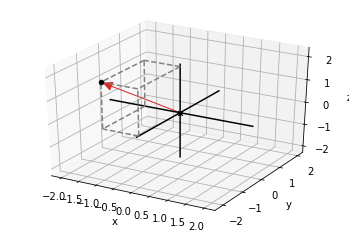

In [1]:
from draw3d import draw3d, Arrow3D, Points3D, Box3D

draw3d(
    Points3D((-1, -2, 2)),
    Arrow3D((-1, -2, 2,)),
    Box3D(-1, -2, 2)
)

## There are exactly 8 3D vectors whose coordinates are all either +1 or -1. For instance, (1, -1, 1) is one of these. Plot all these eight vectors as points, then figure out how to connect them with segments to form the outline of a cube.

Let's start by defining these vectors, and drawing the Points.

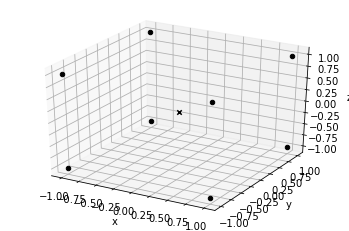

In [2]:
points = [(-1, -1, -1), (-1, -1, 1), (-1, 1, -1), (-1, 1, 1),
          (1, -1, -1),  (1, -1, 1),  (1, 1, -1),  (1, 1, 1)]

draw3d(Points3D(*points), axes=None)

Now, let's draw the Segments that connect them:

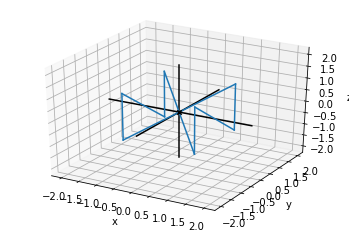

In [3]:
from draw3d import Segment3D

segments = [ Segment3D(points[i], points[(i + 1) % len(points)]) for i in range(0, len(points))]

draw3d(*segments)

The process seems to be ok, but we need to rearrange them in order to connect them and visualize them.

Let's rearrange them using faces

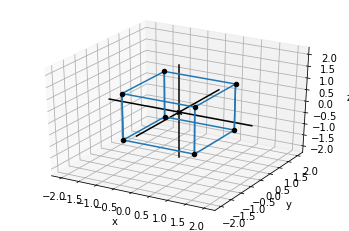

In [4]:
def get_segments_for_face(face_points):
    return [Segment3D(face_points[i], face_points[(i + 1) % len(face_points)]) for i in range(0, len(face_points))]

cube_front_face = [(-1, 1, -1), (-1, 1, 1), (1, 1, 1), (1, 1, -1)]
cube_back_face = [(-1, -1, -1), (-1, -1, 1), (1, -1, 1), (1, -1, -1)]
cube_left_face = [(-1, -1, -1), (-1, 1, -1), (-1, 1, 1), (-1, -1, 1)]
cube_right_face = [(1, -1, -1), (1, 1, -1), (1, 1, 1), (1, -1, 1)]

draw3d(
    *get_segments_for_face(cube_front_face),
    *get_segments_for_face(cube_back_face),
    *get_segments_for_face(cube_left_face),
    *get_segments_for_face(cube_right_face),
    Points3D(*points)
)

Note how the bottom and top faces didn't have to be defined.

Note also that there seems a smarter way to implement the solution.
For example:
+ the vertices can range over the list of possible values [-1, 1]
+ the edges can be grouped into three sets of four that point in each coordinate direction (e.g. there are four edges that go from x=-1 to x=1, while y and z coordinates are the same at both endpoints)

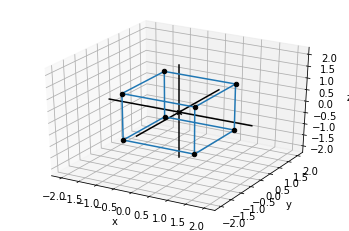

In [5]:
pm1 = [1, -1]
vertices = [(x, y, z) for x in pm1 for y in pm1 for z in pm1]
edges = [((-1,y,z),(1,y,z)) for y in pm1 for z in pm1] +\
    [((x,-1,z),(x,1,z)) for x in pm1 for z in pm1] +\
    [((x,y,-1),(x,y,1)) for x in pm1 for y in pm1]

draw3d(
    Points3D(*vertices),
    *[Segment3D(*edge) for edge in edges]
)

## Draw $ (4, 0, 3) $ and $ (-1, 0, 1) $ as `Arrow3D` objects such that they are placed *tip-to-tail* in both orders in 3D. What is their vector sum.

We can use the `add(...)` function to calculate the vector sum and the `draw3d(...)` functions to geometrically demonstrate that $ (4, 0, 3) + (-1, 0, 1) $ is the same as $ (-1, 0, 1) + (4, 0, 3) $ 

In [6]:
def add(*vectors):
  by_coordinate_list = zip(*vectors)
  sum_by_coordinate_list = [sum(coords) for coords in by_coordinate_list]
  return tuple(sum_by_coordinate_list)

u = (4, 0, 3)
v = (-1, 0, 1)

print('u + v = {}; v + u = {}'.format(add(u, v), add(v, u)))

u + v = (3, 0, 4); v + u = (3, 0, 4)


Now let's draw it to demonstrate it geometrically:

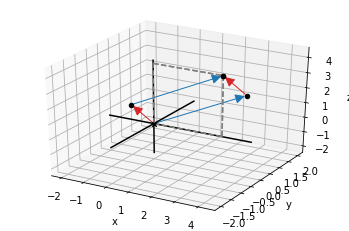

In [7]:
from draw3d import blue, red
draw3d(
    Arrow3D(u, color=blue), Points3D(u),
    Arrow3D(add(u, v), u, color=red), Points3D(add(u, v)),
    Arrow3D(v, color=red), Points3D(v),
    Arrow3D(add(v, u), v, color=blue), Points3D(add(v, u)),
    Box3D(3, 0, 4)
)

## Suppose we set `vectors1=[(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]` and `vectors2=[(1, 2), (3, 4), (5, 6)]`. Without evaluating in in Python, what are the lengths of `zip(*vectors1)` and `zip(*vectors2)`.

The `zip(...)` function takes an iterable and returns another iterable in which the first element is the collection of all the first elements, the second element, the collection of all the second elements, etc.

`zip((a, b), (c, d), (e, f)) = [(a, c, e), (b, d, f)]`

Therefore:
```python
len(zip(*vectors1)) = 5 # having two elements each
len(zip(*vectors2)) = 2 # having 5 elements each
```

## The following comprehension creates a list of 24 Python vectors:

```Python
from math import sin, cos, pi

vs = [(sin(pi * t * 6), cos(pi * t * 6), 1.0 / 3) for t in range(0, 24)]
```

Calculate the sum of the 24 vectors. Draw all 24 of them *tip-to-tail* as `Arrow3D` objects.

We have alreade define `add(*v)` to calculate the sum vector. The next activity is just iterate the collection of vectors to create the *tip-to-tail*.

In [8]:
from math import sin, cos, pi

vectors = [(sin(pi * t / 6), cos(pi * t / 6), 1.0 / 3) for t in range(0, 24)]

sum_vector = add(*vectors)
print('sum_vector={}'.format(sum_vector))

sum_vector=(-4.440892098500626e-16, -7.771561172376096e-16, 7.9999999999999964)


To come up with the list comprehension, it is always a good practice to start manually with a few iterations:

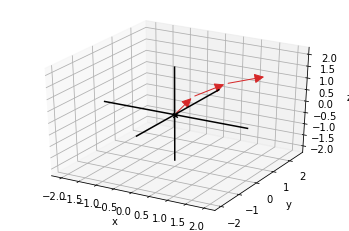

In [9]:
first_arrow = Arrow3D(vectors[0]) # this one should start from origin
second_arrow = Arrow3D(add(vectors[0], vectors[1]), vectors[0])
third_arrow = Arrow3D(
    add(vectors[0], vectors[1], vectors[2]),
    add(vectors[0], vectors[1])
)

draw3d(
    first_arrow,
    second_arrow,
    third_arrow
)

So we need:
+ in the first iteration, only `vectors[0]` is drawn
+ for the subsequent iterations we need:
  + the sum vector for range 0, iteration i + 1
  + the sum vector for range 0, iteration

Let's do with an imperative function, as creating a list comprehension seems challenging:

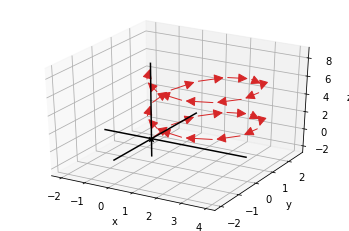

In [10]:
def get_tip_to_tail_coords(*vectors):
    coords = []
    running_sum_vector = (0, 0, 0)
    for i in range(0, len(vectors)):
        next_sum_vector = add(vectors[i], running_sum_vector)
        coords.append((next_sum_vector, running_sum_vector))
        running_sum_vector = next_sum_vector
    return [Arrow3D(v[0], v[1]) for v in coords]

draw3d(*get_tip_to_tail_coords(*vectors))



## Write a function `scale(scalar, vector)` that returns input scalar times the input vector. It must be written in a way that works for vectors of any dimension (2D, 3D, ...) 

In [11]:
def scalar_product(factor, v):
  """
  Return the vector resulting from multiplying input scalar times the input vector.

  Factor is any real number, and v is a vector given in their Cartesian coordinates.
  """
  return tuple( factor * v_i for v_i in v )

## Let $ u = (1, -1, -1) $ and $ v = (0, 0, 2) $. What is the result of $ u + \frac{1}{2} \cdot (v - u) $. How can this point be interpreted geometrically?

Using what we know of vector addition and scalar product:

$ 
u + \frac{1}{2} \cdot (v - u) = \\
= (1, -1, -1) + \frac{1}{2} \cdot ((0, 0, 2) - (1, -1, -1)) = \\
= (1, -1, -1) + \frac{1}{2} \cdot (-1, 1, 3) = \\
(1, -1, -1) + (-\frac{1}{2}, \frac{1}{2}, \frac{3}{2}) = \\
= (\frac{1}{2}, -\frac{1}{2}, \frac{1}{2})
$

In [12]:
def subtract(v, w):
  return tuple( v[i] - w[i] for i in range(0, len(v)) )

u = (1, -1, -1)
v = (0, 0, 2)

result_vector = add(u, scalar_product(0.5, subtract(v, u)))

print('u + 1/2 * (v - u) = {}'.format(result_vector))


u + 1/2 * (v - u) = (0.5, -0.5, 0.5)


The geometric representation of this point is as follows:
> As $ v - u $ is the displacement vector from $ u $ to $ v $, $ u + \frac{1}{2} \cdot (v - u) $ it is the middle point between $ u $ and $ v $. 

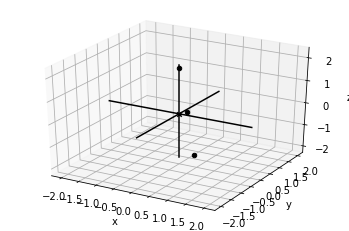

In [13]:
draw3d(
    Points3D(u, v, result_vector)
)

## Try to find the answers for this exercise without using code and then check you work. What is the length of the 2D vector $ (1, 1) $? What is the length of the 3D vector $ (1, 1, 1) $? What do you think would be the length of the 4D vector with coordinages $ (1, 1, 1, 1) $?

Let $ r_{2} $ be the length of the vector $ (1, 1) $.

We know from the Pythagorean theorem that:
$ r_{2} = \sqrt{1^{2} + 1^{2}} = \sqrt{2} $

Let $ r_{3} $ be the length of the vector $ (1, 1, 1) $. We know from previous exercises that we can apply the Pythagorean theorem twice: once in the 2D plane where z = 1, then to the resulting right triangle that gives us the final vector.

That final vector has a leg of length 1, and another leg of length $ r_{2} = \sqrt{2} $. Thus:

$
r_{3} = \sqrt{(\sqrt{2})^{2} + 1^{2}} = \sqrt{2 + 1} = \sqrt{3} = \sqrt{1^2 + 1^2 + 1^2}
$

As such, we can assume that in 4D we would have:

$
r_{4} = \sqrt{(\sqrt{3})^2 + 1^{2}} = \sqrt{3 + 1} = \sqrt{4} = \\
= \sqrt{1^2 + 1^2 + 1^2 + 1^2} = 2 
$


Let's verify in it code.

In [14]:
from math import sqrt

def length(v):
  """Return the length of the vector

  v is a vector given in their Cartesian coordinates.
  """
  return sqrt(sum([ v_i ** 2 for v_i in v]))

print('length((1, 1))={}; √2 = {}'.format(length((1, 1)), sqrt(2)))
print('length((1, 1, 1))={}; √3 = {}'.format(length((1, 1, 1)), sqrt(3)))
print(
    'length((1, 1, 1, 1))={}'.format(length((1, 1, 1, 1))))

length((1, 1))=1.4142135623730951; √2 = 1.4142135623730951
length((1, 1, 1))=1.7320508075688772; √3 = 1.7320508075688772
length((1, 1, 1, 1))=2.0


## The coordinates 3, 4, 12 in any order create a vector of length 13. This is unusual because 13 is a whole number, but most numbers are not perfect squares, meaning that the square root that is used when calculating the length of a vector returns an irrational number. Find a different triple of whole numbers that define coordinates of a vector with a whole number length.

We can use Python to find a brute-force approach to find that numbers.

Note that:
+ We create a generator with a default value that sets the max coordinate to 100
+ generator results must be materialized: otherwise you get a *generator function object* as a results
+ `num.is_integer()` can be used to assert whether `num` is an integer


In [15]:
def vectors_with_whole_number_length(max_coord=100):
    for x in range(1, max_coord):
        for y in range(1, x + 1):
            for z in range(1, y + 1):
                if length((x, y, z)).is_integer():
                    yield (x, y, z)

vectors = [ v for v in vectors_with_whole_number_length() ]
for i in range(1, len(vectors)):
    print('{}, |v|={}'.format(vectors[i], length(vectors[i])))




(4, 4, 2), |v|=6.0
(6, 3, 2), |v|=7.0
(6, 6, 3), |v|=9.0
(7, 4, 4), |v|=9.0
(7, 6, 6), |v|=11.0
(8, 4, 1), |v|=9.0
(8, 8, 4), |v|=12.0
(9, 6, 2), |v|=11.0
(10, 10, 5), |v|=15.0
(11, 10, 2), |v|=15.0
(12, 4, 3), |v|=13.0
(12, 6, 4), |v|=14.0
(12, 9, 8), |v|=17.0
(12, 12, 1), |v|=17.0
(12, 12, 6), |v|=18.0
(14, 5, 2), |v|=15.0
(14, 8, 8), |v|=18.0
(14, 12, 12), |v|=22.0
(14, 14, 7), |v|=21.0
(15, 10, 6), |v|=19.0
(16, 8, 2), |v|=18.0
(16, 11, 8), |v|=21.0
(16, 13, 4), |v|=21.0
(16, 15, 12), |v|=25.0
(16, 16, 8), |v|=24.0
(17, 6, 6), |v|=19.0
(18, 6, 1), |v|=19.0
(18, 9, 6), |v|=21.0
(18, 12, 4), |v|=22.0
(18, 13, 6), |v|=23.0
(18, 14, 3), |v|=23.0
(18, 18, 9), |v|=27.0
(19, 8, 4), |v|=21.0
(20, 5, 4), |v|=21.0
(20, 12, 9), |v|=25.0
(20, 20, 10), |v|=30.0
(20, 20, 17), |v|=33.0
(21, 12, 12), |v|=27.0
(21, 16, 12), |v|=29.0
(21, 18, 14), |v|=31.0
(21, 18, 18), |v|=33.0
(22, 6, 3), |v|=23.0
(22, 14, 7), |v|=27.0
(22, 20, 4), |v|=30.0
(22, 21, 6), |v|=31.0
(22, 22, 11), |v|=33.0
(23, 10, 10)

## Find a vector in the same direction as $ (-1, -1, 2) $ but which has length 1.

We need to use the scalar product to find the factor that gives as a result a vector with length 1.

In [16]:
print(length((-1, -1, 2)))

2.449489742783178


We know that to find that vector, we need to find a factor $ r $ that when multiplied to $ (-1, -1, 2) $ gives us a vector with length 1 (based on the scalar product, that generates a vector in the same direction as the given one, but with different length).

Then, we have

$
|r \cdot (-1, -1, 2) | = | (-r, -r, 2 \cdot r) | = \\
= \sqrt{(-r)^{2} + (-r)^{2} + (2 \cdot r)^{2}} = 1 \\
\sqrt{6 \cdot r^{2}} = 1 \\
r^{2} = \frac{1}{6} \\
r = \sqrt{\frac{1}{6}} \approx 0.41
$

Thus, the vector will be approximately $ (-0.41, -0.41, 0.82) $

We could have also used Python to implement a brute force approach. We need to find an `r` such that `length(scalar_product(r, v)) = 1` (or as closer as we can get).

In [17]:
import numpy as np

v = (-1, -1, 2)
print('length(v)={}'.format(length(v)))

candidate_r_list = [r for r in np.arange(0, 1, 0.01)]

best_r_so_far = -10
closer_vector_length_so_far = 1000
for r in candidate_r_list:
    vector_length = length(scalar_product(r, v))
    if abs(1.0 - vector_length) < abs(1.0 - closer_vector_length_so_far):
       best_r_so_far = r
       closer_vector_length_so_far = vector_length

print('r={}, which gives us length(r*v)={}'.format(best_r_so_far, closer_vector_length_so_far))


length(v)=2.449489742783178
r=0.41000000000000003, which gives us length(r*v)=1.004290794541103


In [18]:
## What is the dot product of (-1, -1, 1) and (1, 2, 1)? Are these two 3D vectors separated by more than 90°, less than 90° or exactly 90°?

In [19]:
def dot_product(u, v):
  return sum([coord1 * coord2 for coord1, coord2 in zip(u, v)])

u = (-1, -1, 1)
v = (1, 2, 1)

dot_product_result = dot_product(u, v)

print('u · v = {}'.format(dot_product_result))

u · v = -2


Just by having a look at the result we know that the vectors are separated by more than 90°, because their dot product is negative.

We can also use the alternative formula for the dot product:

$
u \cdot v = |u| \cdot |v| \cdot cos(\theta)
$

Therefore:

In [20]:
from math import pi, acos

def angle_between(u, v):
  return acos(dot_product(u, v) / (length(u) * length(v)))

def to_radians(degrees):
  return (degrees * pi) / 180

def to_degrees(radians):
  return (radians * 180) / pi

theta = angle_between(u, v)

print('θ = {} rad = {}°'.format(theta, to_degrees(theta)))


θ = 2.061679005084208 rad = 118.1255057020557°


## For two 3D vectors u and v, the values of $ (2 \cdot u) \cdot v $ and $ u \cdot (2 \cdot v) $ are both equal to $ 2 \cdot (u \cdot v) $. For example, if $ u \cdot v = 18 $ both $ (2 \cdot u) \cdot v $ and $ u \cdot (2 \cdot v) $ are 36, twice the original result. Show that this works for any real number $ s $, not just 2. That is, demonstrate that for any value $ s $, the values of $ (s \cdot u) \cdot v $ and $ u \cdot (s \cdot v) $ are both equal to $ s \cdot (u  \cdot v) $

Let $ u = (u_1, u_2, ..., u_n) $ and $ v = (v_1, v_2, ..., v_n) $.

Then:
$
(s \cdot u) \cdot v = (s \cdot u_1, s \cdot u_2, ... s \cdot u_n) \cdot (v_1, v_2, ..., v_n) = \\
= (s \cdot u_1 \cdot v_1 + s \cdot u_2 \cdot v_2 + ... + s \cdot u_n \cdot v_n) = \\
= (u_1, u_2, ..., u_n) \cdot (s \cdot (v_1, v_2, ..., v_n)) = \\
= s \cdot ((u_1, u_2, ..., u_n) \cdot (v_1, v_2, ..., v_n)) = \\
= s \cdot (u \cdot v)
$

## Explain algebraically why the dot product of a vector with itself is the square of its length.

Let $ u = (u_1, u_2, ..., u_n) $.

$
u \cdot u = u_1^2 + u_2^2 + ... + u_n^2 = | u |^2 
$

## Find a vector $ u $ of length 3 and a vector $ v $ of length 7 such that $ u \cdot v = 21 $. Find another pair of vectors $ u $ and $ v $ such that $ u \cdot v = -21 $. Finally, find three more pair of vectors so that all their dot products lie between -21 and 21.

We know that if two vectors lie in the same direction (i.e. the angle between them is 0) their dot product is the product of their lengths.

Thus $ u = (3, 0) $ and $ v = (7, 0) $.

In [21]:
u = (3, 0)
v = (7, 0)

print('u · v = {}'.format(dot_product(u, v)))

u · v = 21


Also, we know that if two vectors are in the opposite direction (i.e. the angle between them is 180°) their dot product is $ - | u | \cdot  | v | $.

Thus $ u = (3, 0) $ and $ v = (-7, 0) $.


In [22]:
u = (3, 0)
v = (-7, 0)

print('u · v = {}'.format(dot_product(u, v)))

u · v = -21


In order to find the remaining vectors, we just have to rotate one of the vectors. The easiest way would be to convert from cartesian coordinates, then to polar, rotate, etc.

In [23]:
from math import atan2

def to_cartesian(polar_vector):
  length, angle = polar_vector[0], polar_vector[1]
  return (length * cos(angle), length * sin(angle))

def to_radians(degrees):
  return (degrees * pi) / 180

def to_degrees(radians):
  return (radians * 180) / pi

def to_polar(vector):
  x, y = vector[0], vector[1] # destructuring
  angle = atan2(y, x)
  return (length(vector), angle)

u = (3, 0)
u_1 = to_cartesian((3, pi / 4))
u_2 = to_cartesian((3, 2 * pi / 4))
u_3 = to_cartesian((3, 3 * pi / 4))

print('u_1 · v = {}'.format(dot_product(u_1, v)))
print('u_2 · v = {}'.format(dot_product(u_2, v)))
print('u_3 · v = {}'.format(dot_product(u_3, v)))



u_1 · v = -14.8492424049175
u_2 · v = -1.2858791391047208e-15
u_3 · v = 14.849242404917497


## Let $ u $ and $ v $ be vectors with $ |u| = 3.61 $ and $ |v| = 1.44 $. If the angle between them is 101.3°. What is $ u \cdot v $? 

Algebraically:

$ u \cdot v = |u| \cdot \ |v| \cdot cos(\theta) $

Thus:

In [24]:
dot_product_result = 3.61 * 1.44 * cos(to_radians(101.3))

print('u · v = {}'.format(dot_product_result))

u · v = -1.0186064362303022


In [25]:
## Find the angle between $ (3, 4) $ and $ (4, 3) $ by converting them to polar coordinates and taking the difference of the angles.

In [26]:
u = (3, 4)
u_polar = to_polar(u)

v = (4, 3)
v_polar = to_polar(v)

theta = abs(u_polar[1] - v_polar[1])
 
print('θ={} rad = {}°'.format(theta, to_degrees(theta)))

θ=0.2837941092083278 rad = 16.260204708311957°


## What is the angle between $ (1, 1, 1) $ and $ (-1, -1, 1) $

In [27]:
theta = angle_between((1, 1, 1), (-1, -1, 1))
print('θ={} rad = {}°'.format(theta, to_degrees(theta)))

θ=1.9106332362490186 rad = 109.47122063449069°


## In what direction does the result of $ (0, 0, 3)  \times (0, -2, 0) $ point?

We can do use the right-hand rule to obtain the direction:

![Right Hand Rule](https://upload.wikimedia.org/wikipedia/commons/d/d2/Right_hand_rule_cross_product.svg)

If we place the index finger in the direction of $ (0, 0, 3) $ and the middle finger in the direction of $ (0, -2, 0) $, the the thumb will give us the direction of the cross product => in the positive x.

Also, algebraically:
$
(0, 0, 3) \times (0, -2, 0) = \\
3 \vec{k} \times (-2) \vec{j} = \\
(-6) \cdot \vec{k} \times \vec{j} = \\
(-6) \cdot (-\vec{i}) = 6 \vec{i}
$


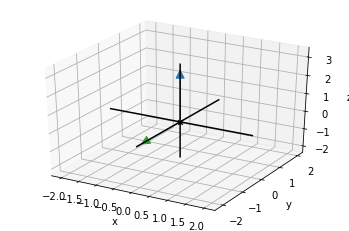

In [28]:
from draw3d import green

draw3d(
    Arrow3D((0, 0, 3), color=blue),
    Arrow3D((0, -2, 0), color=green)
)

## What are the coordinates of the cross product of $ (1, -2, 1) $ and $ (-6, 12, -6) $?

We can easily see that $ (-6, 12, -6) = -6 \cdot (1, -2, 1) $ and therefore, cartesian product will be the vector zero $ \vec{0} $.

We can confirm using Python:

 u x v = (0, 0, 0)


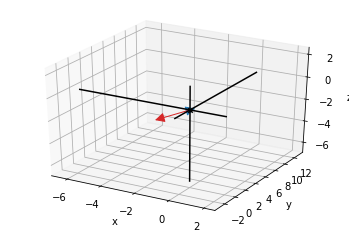

In [29]:
def cross_product(u, v):
  ux, uy, uz = u
  vx, vy, vz = v
  return (uy * vz - uz * vy, uz * vx - ux * vz, ux * vy - uy * vx)

u = (1, -2, 1)
v = (-6, 12, -6)

cross_product_result = cross_product(u, v)

print(' u x v = {}'.format(cross_product_result))

draw3d(
    Arrow3D(u, color=blue),
    Arrow3D(v, color=red)
)

## The area of a parallelogram is equal to the length of its base times its height. Given that, explain why the formula $ |u| \cdot |v| \cdot sin(\theta) $ makes sense.

Given that $ A = b \times h $ for a parallelogram, it is very easy to deduce that the area of a parallelogram can be expressed as $ |u| \cdot |v| \cdot sin(\theta) $.

Let $ \vec{u} $ and $ \vec{v} $ be two vectors in the 2D space, with their tails on the origin of the axis.

For example:

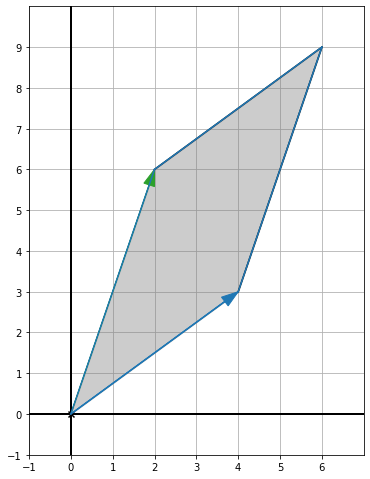

In [30]:
from draw2d import draw2d, Arrow2D, Segment2D, Polygon2D, blue, green, black, gray

u = (4, 3)
v = (2, 6)
draw2d(
    Arrow2D(u, color=blue),
    Segment2D(add(u, v), u, color=black),
    Arrow2D(v, color=green),
    Segment2D(add(u, v), v, color=black),
    Polygon2D((0, 0), u, add(u, v), v, fill=gray)
)

The area of the parallelogram delimited by those vectors will be:

![cross product area](../images/cross_product_area.png)

$
Area = b \cdot h
$

Also:

$
b = |u| \\
sin(\theta) = \frac{h}{|v|}
$

and therefore:

$
Area = |u| \cdot |v| \cdot sin(\theta)
$

## What is the result of the cross product $ (1, 0, 1) \times (-1, 0, 0) $

The result of the cross product will be a vector perpendicular to the plan defined by $ (1, 0, 1) $ and $ (-1, 0, 0) $. 

Therefore, it has to be $ (0, \pm1, 0) $. Using the *right-hand rule* and pointing the index finger in the direction of $ (1, 0, 1) $ and curling the other fingers towards $ (-1, 0, 0) $ we know that the resulting vector will point towards us, in the y- direction.

Therefore, the solution is $ (0, -1, 0) $.

Let's confirm using Python.



u x v = (0, -1, 0)


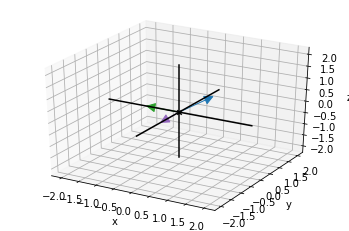

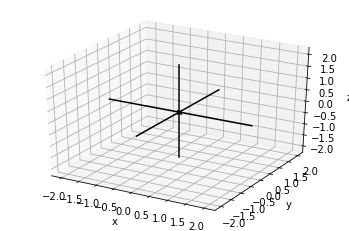

In [31]:
from draw2d import purple

u = (1, 0, 1)
v = (-1, 0, 0)

print('u x v = {}'.format(cross_product(u, v)))

draw3d(
    Arrow3D(u, color=blue),
    Arrow3D(v, color=green),
    Arrow3D(cross_product(u, v), color=purple)
)

draw3d()

### A few notes about orientation

Although already discussed in the concepts section *The cross product: Measuring oriented area*, it is important to emphasize that we should agree on the orientation of the axis, so that cross product and its graphical representation works as expected.

We can either draw the axes as:

![Orientation 1](../images/right-hand_rule.png)

or we can opt for the *i, j , k* basis:

![Standard basis (i, j, k)](../images/standard-basis-i-j-k.png)

Obviously, both graphical representations are the same, the only difference is that the second one points the *x+* axis towards us, while the first one points the *y-* axis towards us.

Our `vector3d` drawing library, uses the first approach.


## Use the Python cross function to compute $ (0, 0, 1) \times \vec{v} $ for a few different values of a second vector v. What is the *z-* coordinate of each result, and why?

As the result of the cross product is a vector perpendicular to the ones involved in the prduct, and the known vector is $ (0, 0, 1) $ the z coordinate will always be zero.

Let's check in Python

In [32]:
vs = [(x, y, z) for x in range(0, 2) for y in range (0, 2) for z in range(0, 2)]

u = (0, 0, 1)
results = [cross_product(u, v) for v in vs]

zipped_list = zip(vs, results)
strings = ['{} x {} = {}'.format(u, z[0], z[1]) for z in zipped_list]

for i in range(0, len(strings)):
    print(strings[i])

(0, 0, 1) x (0, 0, 0) = (0, 0, 0)
(0, 0, 1) x (0, 0, 1) = (0, 0, 0)
(0, 0, 1) x (0, 1, 0) = (-1, 0, 0)
(0, 0, 1) x (0, 1, 1) = (-1, 0, 0)
(0, 0, 1) x (1, 0, 0) = (0, 1, 0)
(0, 0, 1) x (1, 0, 1) = (0, 1, 0)
(0, 0, 1) x (1, 1, 0) = (-1, 1, 0)
(0, 0, 1) x (1, 1, 1) = (-1, 1, 0)


## Show algebraically that $ u \times v $ is perpendicular to both $ u $ and $ v $, regardless of the coordinates of $ u $ and $ v $.

We know from the properties of the dot product that if $ \vec{a} $ and $ \vec{b} $ are perpendicular, $ \vec{a} \cdot \vec{b} = 0 $.

Therefore, we can demonstrate that $ u \times v $ is perpendicular to both $ u $ and $ v $ by verifying that:

$
u \cdot (u \times v) = 0 \\
v \cdot (u \times v) = 0
$

In order to demonstrate it, it is enough to decompose each vector in its coordinates:

$
u \cdot (u \times v) = (u_x, u_y, u_z) \cdot (u_y \cdot v_z - u_z \cdot v_y, u_z \cdot v_x - u_x \cdot v_z, u_x \cdot v_y - u_y \cdot v_x) = \\
u_x u_y v_Z - u_x u_z v_y + u_y u_z v_x - u_y u_x v_z + u_z u_x v_y - u_z u_y v_x = 0 \\
$

And same thing for $ v $:

$
v \cdot (u \times v) = (v_x, v_y, v_z) \cdot (u_y \cdot v_z - u_z \cdot v_y, u_z \cdot v_x - u_x \cdot v_z, u_x \cdot v_y - u_y \cdot v_x) = \\
v_x u_y v_Z - v_x u_z v_y + v_y u_z v_x - v_y u_x v_z + v_z u_x v_y - v_z u_y v_x = 0 \\
$

## Find pairs of vectors defining each of the 12 edges of the octahedron and draw all of the edges in Python

We know from the concepts section that a octahedron has 6 vertices:

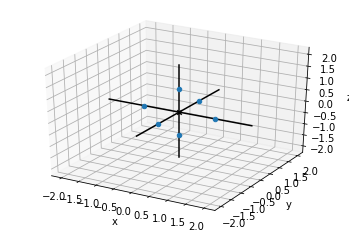

In [33]:
octahedron_vertices = [(1, 0, 0,), (0, 1, 0), (0, 0, 1),
(-1, 0, 0), (0, -1, 0), (0, 0, -1)]

draw3d(
    Points3D(*octahedron_vertices, color=blue)
)



The edges of the shape are the lines that delimit the shape. With the picture above is very easy to decide which vectors are the ones defining the edges for the octahedron:

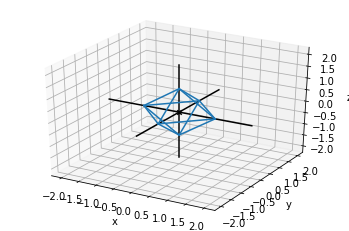

In [34]:
edges_octahedron = [
    # top
    Segment3D((-1, 0, 0), (0, 0, 1), color=blue),
    Segment3D((0, -1, 0), (0, 0, 1), color=blue),
    Segment3D((1, 0, 0), (0, 0, 1), color=blue),
    Segment3D((0, 1, 0), (0, 0, 1), color=blue),

    # mid
    Segment3D((0, -1, 0), (-1, 0, 0), color=blue),
    Segment3D((1, 0, 0), (0, -1, 0), color=blue),
    Segment3D((1, 0, 0), (0, 1, 0), color=blue),
    Segment3D((-1, 0, 0), (0, 1, 0), color=blue),
    
    # bottom
    Segment3D((0, 0, -1), (0, -1, 0), color=blue),
    Segment3D((0, 0, -1), (1, 0, 0), color=blue),
    Segment3D((0, 0, -1), (0, 1, 0), color=blue),
    Segment3D((0, 0, -1), (-1, 0, 0), color=blue)
]

draw3d(*edges_octahedron)

This can be expressed more succinctly programmatically:

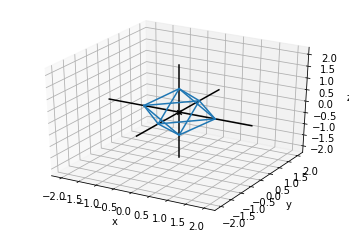

In [35]:
top_vertex = (0, 0, 1)
bottom_vertex = (0, 0, -1)

xy_plane_vertices = [(1, 0, 0), (0, 1, 0), (-1, 0, 0), (0, -1, 0)]

edges = [Segment3D(top_vertex, vertex, color=blue) for vertex in xy_plane_vertices] + \
[Segment3D(bottom_vertex, vertex, color=blue) for vertex in xy_plane_vertices] + \
[Segment3D(xy_plane_vertices[i], xy_plane_vertices[(i + 1) % 4]) for i in range(0, len(xy_plane_vertices))]

draw3d(*edges)

## The first face of the octahedron is `[(1, 0, 0), (0, 1, 0), (0, 0, 1)]`. Is that the only valid order to write the vertices for this face?

Obviously not: any circular permutation will render the same cross product:

`[(0, 1, 0), (0, 0, 1), (1, 0, 0)]` and `[(0, 0, 1), (1, 0, 0), (0, 1, 0)]` will work too.

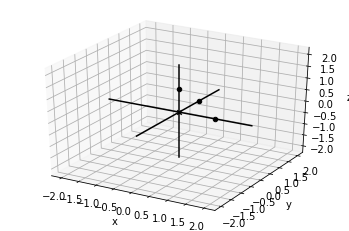

In [36]:
face1 = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]

draw3d(Points3D(*face1))

## Revisiting how to render a 3D shape in 2D

The section on how to render 3D shapes in a computer display is explained really quickly, this section revisits it with more detail.

We will start by going through the exact same steps from the concepts section.

The first step is to define the *shape under study*. In our case, it will be the *octahedron* which can be visualized as two pyramids stacked on top of each other.

![octahedron](../images/octahedron.png)

The fundamental parts that will let us draw the octahedron is the definition of their edges (namely, the lines that delimit the octahedron faces).

We have already seen how to define them and draw them:

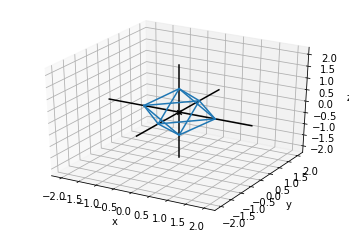

In [37]:
top_vertex = (0, 0, 1)
bottom_vertex = (0, 0, -1)

xy_plane_vertices = [(1, 0, 0), (0, 1, 0), (-1, 0, 0), (0, -1, 0)]

edges = [Segment3D(top_vertex, vertex, color=blue) for vertex in xy_plane_vertices] + \
[Segment3D(bottom_vertex, vertex, color=blue) for vertex in xy_plane_vertices] + \
[Segment3D(xy_plane_vertices[i], xy_plane_vertices[(i + 1) % 4]) for i in range(0, len(xy_plane_vertices))]

draw3d(*edges)

However, this organization of unordered segments is not useful for the rendering. Instead, we will need to structure them as *triples* (3-tuples) of vectors that define the faces and will help us calculate the orientation of the faces.

In [38]:
octahedron_faces = [ 
      [(1, 0, 0), (0, 1, 0), (0, 0, 1)],
      [(1, 0, 0), (0, 0, -1), (0, 1, 0)],
      [(1, 0, 0), (0, 0, 1), (0, -1, 0)],
      [(1, 0, 0), (0, -1, 0), (0, 0, -1)],
      [(-1, 0, 0), (0, 0, 1), (0, 1, 0)],
      [(-1, 0, 0), (0, 1, 0), (0, 0, -1)],
      [(-1, 0, 0), (0, -1, 0), (0, 0, 1)],
      [(-1, 0, 0), (0, 0, -1), (0, -1, 0)]
]



To understand how it is going, we can define a helper function that will let us unpack the vertices from the faces structure:

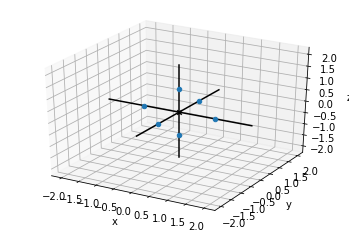

In [39]:
def vertices(faces):
    return list(set([vertex for face in faces for vertex in face]))

draw3d(Points3D(*vertices(octahedron_faces), color = blue))

Let's complete the rest of the faces:


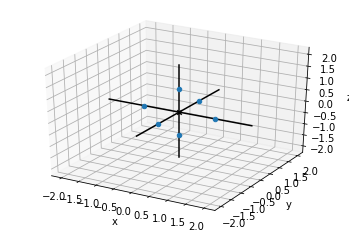

In [40]:
octahedron_faces = [ 
      [(1, 0, 0), (0, 1, 0), (0, 0, 1)],
      [(1, 0, 0), (0, 0, -1), (0, 1, 0)],
      [(1, 0, 0), (0, 0, 1), (0, -1, 0)],
      [(1, 0, 0), (0, -1, 0), (0, 0, -1)],
      [(-1, 0, 0), (0, 0, 1), (0, 1, 0)],
      [(-1, 0, 0), (0, 1, 0), (0, 0, -1)],
      [(-1, 0, 0), (0, -1, 0), (0, 0, 1)],
      [(-1, 0, 0), (0, 0, -1), (0, -1, 0)]
]

draw3d(Points3D(*vertices(octahedron_faces), color = blue))

Now we get into the complicated stuff. 
The first step is to turn the 3D points into 2D, and to do that, we first need to know the part of any 3D vector that is pointing on a given direction. This will be used for projecting the vectors that make up the faces of the shape:

In [41]:
def component(v, direction):
    return (dot_product(v, direction) / length(direction))

Let's dissect a little bit what we are doing:
> the dot product of two vectors gives us a measure of how aligned two vectors are: if they're perpendicular, the dot product will be zero, if align in the same direction, the dot product will be the multiplication of their lengths, if they're in opposite directions the dot product will be the multiplication of their lengths times `-1`.

Thus:

In [42]:

print('component((1, 0, 0), (1, 2, 3)={}'.format(component((1, 0, 0), (1, 2, 3))))

print('component((1, 0, 0), (1, 1, 0)={}'.format(component((1, 0, 0), (1, 1, 0))))

print('component((1, 0, 0), (2, 0, 0)={}'.format(component((1, 0, 0), (2, 0, 0))))

print('component((1, 0, 0), (5, 0, 0)={}'.format(component((1, 0, 0), (5, 0, 0))))


print('component((1, 2, 3), (1, 0, 0)={}'.format(component((1, 2, 3), (1, 0, 0))))

component((1, 0, 0), (1, 2, 3)=0.2672612419124244
component((1, 0, 0), (1, 1, 0)=0.7071067811865475
component((1, 0, 0), (2, 0, 0)=1.0
component((1, 0, 0), (5, 0, 0)=1.0
component((1, 2, 3), (1, 0, 0)=1.0


It may not seem apparent at first, but actually, the component function can be used to extract the coordinates from a vector:



In [43]:
# x coordinate of (1, 2, 3)
print('component((1, 2, 3), (1, 0, 0)={}'.format(component((1, 2, 3), (1, 0, 0))))

# y coordinate of (1, 2, 3)
print('component((1, 2, 3), (0, 1, 0)={}'.format(component((1, 2, 3), (0, 1, 0))))

component((1, 2, 3), (1, 0, 0)=1.0
component((1, 2, 3), (0, 1, 0)=2.0


Now we can lean on the component function to project any given vector into the x,y plane:

vector_to_2d((1, 2, 3)


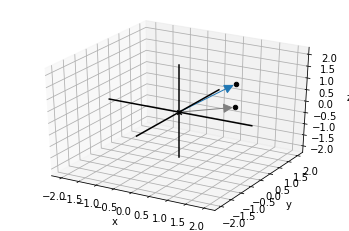

In [44]:
def vector_to_2d(vector): 
      return (component(vector, (1,0,0)), component(vector, (0,1,0)))

print('vector_to_2d((1, 2, 3)'.format(vector_to_2d((1, 2, 3))))

v = (1, 1, 1)
v_projection_on_xy = vector_to_2d(v)

draw3d(
    Arrow3D(v, color=blue),
    Arrow3D((*v_projection_on_xy, 0), color=gray),
    Points3D(v, (*v_projection_on_xy, 0), color=black)
)


Now we're in a good position to apply this projection to all the vertices on a given face:

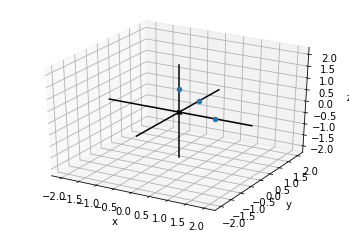

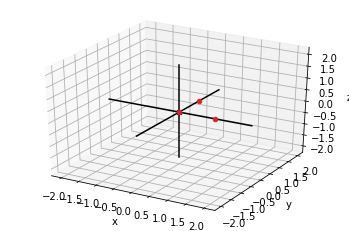

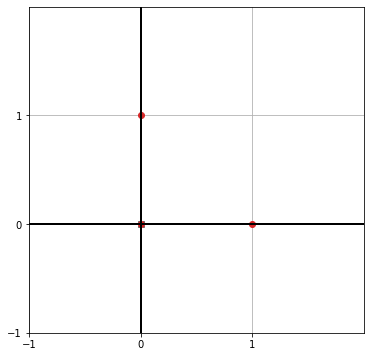

In [45]:
from draw2d import Points2D

def face_to_2d(face):
    return [vector_to_2d(vertex) for vertex in face]

projected_points = [(*vector_2d, 0) for vector_2d in face_to_2d(octahedron_faces[0])]

draw3d(
    Points3D(*octahedron_faces[0], color=blue)
)

draw3d(
    Points3D(*projected_points, color=red)
)

draw2d(
    Points2D(*face_to_2d(octahedron_faces[0]), color=red)
)

The next step is to implement the shading technique.

This is based in picking a different shade of a given color for each of the triangles. The given shade is decided based on the position of a light source, which we identify as well with a 3D vector.

For example, we can arbitrarily decide that our light source is established on `(1, 2, 3)`.

To get the shades of blue, `matplotlib` offers a function generator for colors that accept a number between 0 and 1 and returns a gamut of shades for the given color:

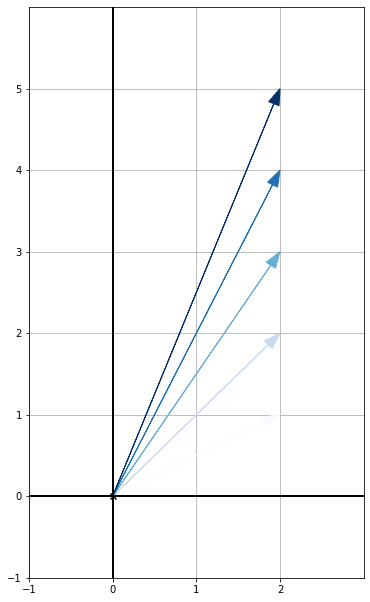

In [46]:
import matplotlib

blues = matplotlib.cm.get_cmap('Blues')


draw2d(
    Arrow2D((2, 1), color=blues(0)),
    Arrow2D((2, 2), color=blues(0.25)),
    Arrow2D((2, 3), color=blues(0.50)),
    Arrow2D((2, 4), color=blues(0.75)),
    Arrow2D((2, 5), color=blues(1.00)),
)

The following diagram is an schematic of the octahedron and the light source. As we see, the light will come from the top and to the right.

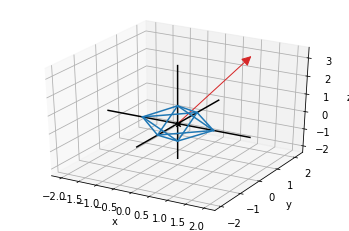

In [47]:
draw3d(
    *edges,
    Arrow3D((1, 2, 3), color=red)
    )

The next step consists in obtaining the *normal* of a surface. The normal is a vector that happens to be perpendicular to a surface.

We will use it to understand which faces will be visible, and which ones are pointing on the direction of the light source.

In this case, the magnitude of the *normal* is unimportant, and therefore, we will start with a support function that given a vector, it returns another one that is scaled so that its length is one:

In [48]:
def unit(vector):
    return scalar_product(1. / length(vector), vector)


print('length((1, 2, 3))={}, unit={}'.format(length((1, 2, 3)), unit((1, 2, 3))))

print('length((5, 0, 0))={}, unit={}'.format(length((5, 0, 0)), unit((5, 0, 0))))


length((1, 2, 3))=3.7416573867739413, unit=(0.2672612419124244, 0.5345224838248488, 0.8017837257372732)
length((5, 0, 0))=5.0, unit=(1.0, 0.0, 0.0)


Now, we can lean on `unit(...)` to get the *normal* of a given surface. We will use this function to get the normal of each of the octahedron faces.

Note that this assumes a certain ordering of the face vertices.

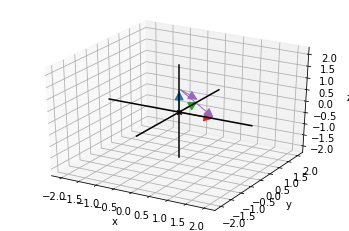

In [49]:

face = octahedron_faces[0]

top = (0, 0, 1)
x_point = (1, 0, 0)

v1 = add(subtract(face[0], face[2]), face[2])
v2 = add(subtract(face[1], face[2]), face[2])

draw3d(
    Arrow3D(face[0], color=red),
    Arrow3D(face[1], color=green),
    Arrow3D(face[2], color=blue),

    Arrow3D(v1, face[2], color=purple),
    Arrow3D(v2, face[2], color=purple)
)

With this picture in mind, we can define a `normal(...)` function that will give us the perpendicular vector to any given face.

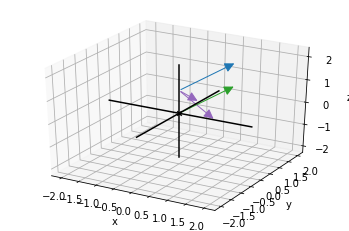

In [50]:
def normal(face):
    return (cross_product(subtract(face[1], face[0]), subtract(face[2], face[0])))

face_0 = octahedron_faces[0]
normal_face_0 = normal(octahedron_faces[0])

draw3d(
    Arrow3D(v1, face_0[2], color=purple),
    Arrow3D(v2, face_0[2], color=purple),    
    # normal
    Arrow3D(normal_face_0, color=green),
    # normal translated to top vertex
    Arrow3D(add(normal_face_0, face_0[2]), face_0[2], color=blue),
    )

Now we can put it all together with a render function:

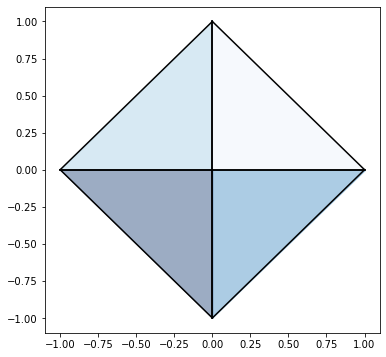

In [53]:

def render(faces, light=(1, 2, 3), color_map=blues, lines=None):
    polygons = []
    for face in faces:
        unit_normal = unit(normal(face))
        if unit_normal[2] > 0:
            c = color_map(1 - dot_product(unit(normal(face)), unit(light)))
            p = Polygon2D(*face_to_2d(face), fill=c, color=lines)
            polygons.append(p)
    draw2d(*polygons, axes=False, origin=False, grid=None)

render(octahedron_faces, color_map=blues, lines=black)

| NOTE: |
| :---- |
| Something looks fishy, as the octahedron above has lighter colors than in the concepts section. |

What about drawing a cubish shape... as we need triangles for the render function, we'd need to divide each square face into 2 triangles: